# Practicing plotting with `pandas`


In this suite of exercises, we will practice creating various types of plots using the `pandas` library in Python.

As usual, we will root our work on `actual data` and perform a realistic  (albeit minimal) scientifc analysis.

## Deforestation Data

We use the [Our World in Data deforestation dataset](https://ourworldindata.org/forests-and-deforestation).

It contains data on forest area and deforestation data for various countries over time. 

Its link is 

[https://ourworldindata.org/grapher/annual-deforestation.csv?v=1&csvType=full&useColumnShortNames=false](https://ourworldindata.org/grapher/annual-deforestation.csv?v=1&csvType=full&useColumnShortNames=false)

## Exercise 1: Loading and pivoting the data

Read in the dataset using `pandas`. 

Then, pivot the data so that you have years as the index, countries as the columns, and deforestation as the values.

In [99]:
# SOLUTION
import pandas as pd
import requests

# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/annual-deforestation.csv?v=1&csvType=full&useColumnShortNames=false")

df

,Entity,Code,Year,Deforestation
0,Africa,NaN,1990,3065370
1,Africa,NaN,2000,3590590
2,Africa,NaN,2010,4054850
3,Africa,NaN,2015,3251240
4,Africa,NaN,2020,3021250
...,...,...,...,...
700,Zimbabwe,ZWE,1990,105720
701,Zimbabwe,ZWE,2000,105720
702,Zimbabwe,ZWE,2010,59670
703,Zimbabwe,ZWE,2015,54330


In [100]:
# SOLUTION
df_pivot = df.pivot(index="Year", columns="Entity", values="Deforestation")
df_pivot

Entity,Africa,Algeria,Angola,Argentina,Asia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,Upper-middle-income countries,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,World,Yemen,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1990,3065370.0,30700.0,NaN,285800.0,3267360.0,645280.0,5460.0,950.0,0.0,NaN,...,11349450.0,0.0,790.0,NaN,0.0,161000.0,5540.0,15818830.0,0.0,105720.0
2000,3590590.0,28050.0,510440.0,382800.0,1988550.0,666890.0,7650.0,38720.0,0.0,NaN,...,8045590.0,0.0,5000.0,NaN,0.0,105150.0,5540.0,13328570.0,0.0,105720.0
2010,4054850.0,33790.0,510440.0,276100.0,1806590.0,441920.0,5130.0,81640.0,0.0,18190.0,...,4322230.0,0.0,1040.0,2920.0,0.0,117390.0,2640.0,9880680.0,0.0,59670.0
2015,3251240.0,11560.0,510440.0,191900.0,1567390.0,447460.0,5130.0,89740.0,0.0,NaN,...,4671770.0,0.0,4000.0,3270.0,0.0,117390.0,1820.0,9473750.0,0.0,54330.0
2020,3021250.0,8670.0,510440.0,195300.0,1016870.0,NaN,5130.0,NaN,0.0,NaN,...,4581990.0,0.0,3000.0,NaN,0.0,60110.0,1820.0,8490110.0,0.0,53000.0


## Exercise 2 : Plotting deforestation for regions

The datasets contains rates in ha/year (hectares per year) for many different countries, as well as the various regions including the world as a whole.

Find the names of such geographical regions (i.e. exclude country names)  in the dataset and create a plot with multiple lines, one for each region, showing deforestation over time. Include also the world as a whole.

**Plot requirements:**

- The plot should have appropriate labels and a legend. 
- The lines should also have markers.
- The lines should be distinguishable by color and line style.
- The line for the World should be thicker than the others.
- The deforestation values should be shown in millions of hectares per year (i.e., divide the values by 1,000,000).

**Notes.** 
- If you look carefully at the original dataset, you will notice that you have a `Code` column that contains codes for countries and regions.
- You can provide a list of styles to the style argument of the `plot` method to have different line styles for each line.
- If `ax` is an axis returned by a plot object, you can access its last plotted line as `ax.lines[-1]` and sets its properties with methods such as `set_linewidth()` or `set_color()`.




In [101]:
# SOLUTION
# the unique codes are
# clearly only the WORLD has its own code OWID_WRL
# hence the regions have NaN
df['Code'].unique()

array([nan, 'DZA', 'AGO', 'ARG', 'AUS', 'AUT', 'AZE', 'BHR', 'BGD', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BTN', 'BRA', 'BGR', 'BFA', 'CMR', 'CAN',
       'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'CRI',
       'CIV', 'HRV', 'CUB', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM',
       'TLS', 'ECU', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FLK',
       'FRO', 'FIN', 'GAB', 'GMB', 'GEO', 'DEU', 'GIB', 'GRL', 'GTM',
       'GIN', 'GUY', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ',
       'IRL', 'IMN', 'ITA', 'JAM', 'JEY', 'JOR', 'KAZ', 'KWT', 'KGZ',
       'LVA', 'LBN', 'LBY', 'LIE', 'LTU', 'MDG', 'MWI', 'MLI', 'MLT',
       'MUS', 'MEX', 'MDA', 'MCO', 'MAR', 'MOZ', 'NAM', 'NRU', 'NLD',
       'NCL', 'NZL', 'NIC', 'NER', 'NOR', 'OMN', 'PAK', 'PAN', 'PNG',
       'PRY', 'POL', 'PRT', 'QAT', 'REU', 'ROU', 'RUS', 'SPM', 'VCT',
       'SMR', 'SAU', 'SEN', 'SRB', 'SGP', 'SVN', 'SOM', 'KOR', 'ESP',
       'SDN', 'SUR', 'SJM', 'SWE', 'CHE', 'SYR', 'TZA', 'TGO', 'TKL',
       'TUN', '

In [102]:
# SOLUTION
# Find entities without country codes - these are typically regions
regions = df[df['Code'].isna()]['Entity'].unique()
print("Regions (non-country entities):")
print(regions)
# add the world to the list
all_regions = list(regions) + ['World']

Regions (non-country entities):
['Africa' 'Asia' 'Europe' 'European Union (27)' 'High-income countries'
 'Low-income countries' 'Lower-middle-income countries' 'North America'
 'Oceania' 'South America' 'Upper-middle-income countries']


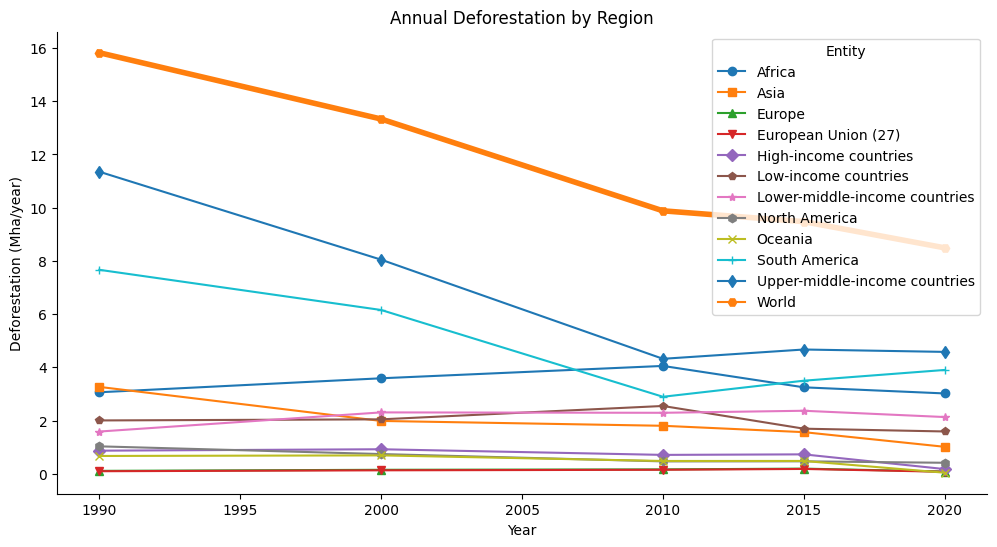

In [103]:
# SOLUTION
markers = ['o', 's', '^', 'v', 'D', 'p', '*', 'h', 'x', '+', 'd', 'H']

ax = (df_pivot[all_regions] / 1_000_000).plot(figsize=(12, 6), 
                                          title="Annual Deforestation by Region", 
                                          ylabel="Deforestation (Mha/year)", 
                                          xlabel="Year",
                                          style=[f'-{m}' for m in markers],
                                          legend=True)

# Make the World line thicker
ax.lines[-1].set_linewidth(4)


## Exercise 3 : Share of deforestation by continent in 2020

Pick now year 2020 and create a pie chart showing the share of deforestation for that year between the various continents (i.e., Africa, Asia, Europe, North America, Oceania, South America). The share is the fraction of the total deforestation in the world that is due to each continent.

**Notes.**

- You can improve the rendering of the pie chart by adding formatted percentage labels with the `autopct` to plot using the `pie` kind.

<Axes: title={'center': 'Deforestation Share by Continent in 2020'}>

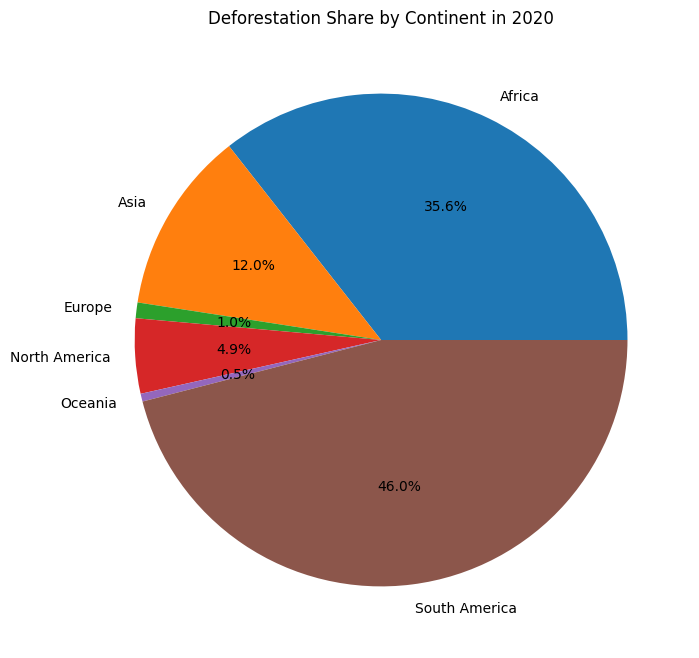

In [104]:
#SOLUTION
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
year = 2020
shares = df_pivot.loc[year, continents] / df_pivot.loc[year, 'World'] * 100
shares.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title=f"Deforestation Share by Continent in {year}", ylabel='')

## Exercise 4: Stacked area plot of regional deforestation

Create a stacked area plot showing how deforestation is distributed across continents over time (1990-2020).

**Requirements:**
- Use only the continental regions (Africa, Asia, Europe, North America, Oceania, South America)
- Show values in millions of hectares per year
- Only include positive values (deforestation, not reforestation)
- Add appropriate title and labels


**Hint:** Use `kind='area'` and set `stacked=True`. 


<Axes: title={'center': 'Deforestation by Continent (1990-2020)'}, xlabel='Year', ylabel='Deforestation (Mha/year)'>

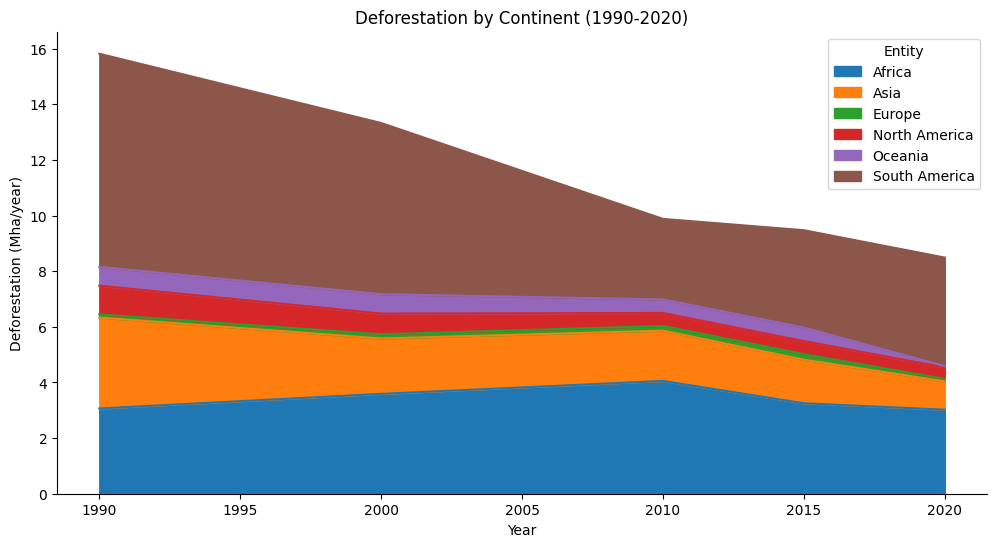

In [105]:
# SOLUTION

# Filter for continental regions and positive deforestation values
df_continents = df_pivot[continents].loc[1990:2020]
df_continents = df_continents[df_continents > 0]

# Convert to millions of hectares
df_continents_mha = df_continents / 1_000_000

# Create stacked area plot
df_continents_mha.plot(kind='area', stacked=True, figsize=(12, 6),
                       title='Deforestation by Continent (1990-2020)',
                       xlabel='Year',
                       ylabel='Deforestation (Mha/year)')

## Exercise 5: Bar plot of top 10 countries with highest deforestation in 2010

Using the data for 2010, create a **bar plot** showing the top 10 countries with the highest deforestation rates in absolute terms. 

Plot them so that they are sorted (ascending or descending, as you prefer).

You need to **exclude regions** and only consider countries.

**Note.**
- Boolean operators can be used to filter dataframes. For example, if we want to filter a dataframe to include only rows where the column `A` doe not contain the value `foo`, we can do:    
```python
filtered_df = df[~(df['A'] == 'foo')]
```
where the `~` operator negates the boolean condition.
- You can use `barh` as the kind of plot to create horizontal bar plots.

In [106]:
# SOLUTION
year = 2010

df_no_regions = df[~df['Entity'].isin(all_regions)]

top_10 = df_no_regions.loc[df['Year'] == year].sort_values(by='Deforestation', ascending=False).head(10)[['Entity', 'Deforestation']]
top_10

,Entity,Deforestation
63,Brazil,1915700
153,Democratic Republic of Congo,1006340
300,India,668400
305,Indonesia,656130
11,Angola,510440
26,Australia,441920
624,Tanzania,403000
504,Paraguay,354020
108,China,329970
16,Argentina,276100


<Axes: title={'center': 'Top 10 Countries by Deforestation in 2010'}, xlabel='Deforestation (ha/year)', ylabel='Country'>

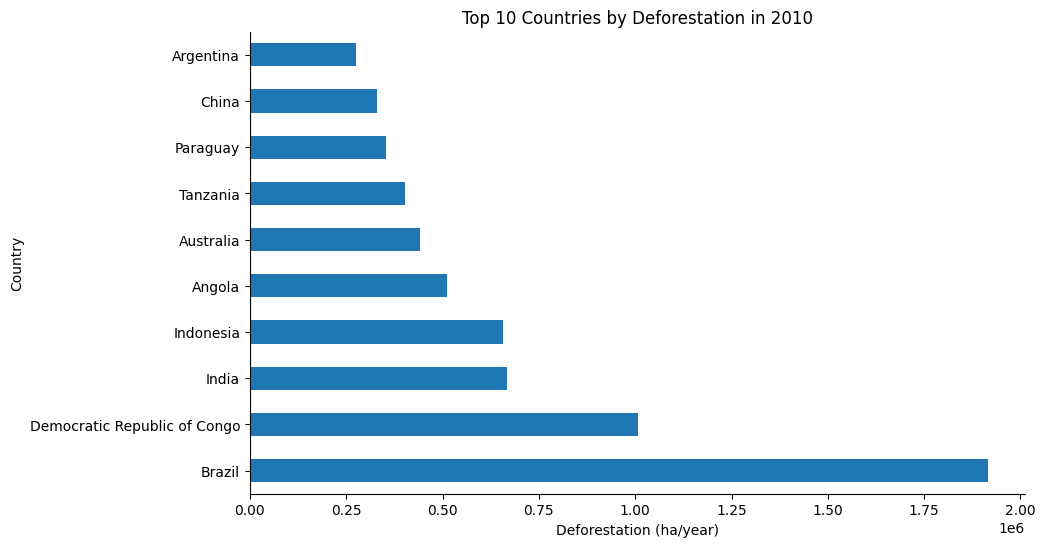

In [107]:
# SOLUTION
top_10.plot(kind='barh', x='Entity', y='Deforestation', figsize=(10, 6), 
            title=f"Top 10 Countries by Deforestation in {year}", 
            xlabel="Deforestation (ha/year)", ylabel="Country", legend=False)

## Exercise 6: Merging datasets and normalisation by area

The comparison above is  in part unfair because countries have different sizes (and hence extent of forested surfaces).

As a first approximation, we can normalise deforestation rates by the total area of each country.

To retrieve the total area data for countries, you'll need to load a CSV file containing country areas. We can use the Our World in Data dataset on land area.

Here's the link to the dataset:

[https://ourworldindata.org/grapher/land-area-km.csv](https://ourworldindata.org/grapher/land-area-km.csv)

We can read this second dataset into a separate dataframe.

A powerful feature of `pandas` is the ability to merge dataframes based on common columns.

This is done using the `pd.merge` function as follows:

```python
merged_df = pd.merge(df1, df2, on=list_of_common_columns)
``` 

Using merging, combine the deforestation data for 2010 with the land area data.

Then, create a new column in the merged dataframe that contains the deforestation rate per square kilometer for each country.

Finally, create a bar plot showing the top 10 countries with the highest deforestation rates per square kilometer in 2010.

**Notes.**

- When merging, provide a list of common columns to the `on` argument. In this case, the common columns are likely to be `Entity`, `Year` and `Code`.

In [ ]:
# SOLUTION
df_areas = pd.read_csv("https://ourworldindata.org/grapher/land-area-km.csv")
df_areas

,Entity,Code,Year,Land area (sq. km)
0,Afghanistan,AFG,1961,652230.0
1,Afghanistan,AFG,1962,652230.0
2,Afghanistan,AFG,1963,652230.0
3,Afghanistan,AFG,1964,652230.0
4,Afghanistan,AFG,1965,652230.0
...,...,...,...,...
12930,Zimbabwe,ZWE,2018,386850.0
12931,Zimbabwe,ZWE,2019,386850.0
12932,Zimbabwe,ZWE,2020,386850.0
12933,Zimbabwe,ZWE,2021,386850.0


In [ ]:
# SOLUTION
df_merged = pd.merge(df, df_areas, on=['Entity',"Year","Code"])

df_merged

,Entity,Code,Year,Deforestation,Land area (sq. km)
0,Algeria,DZA,1990,30700,2381740.0
1,Algeria,DZA,2000,28050,2381740.0
2,Algeria,DZA,2010,33790,2381740.0
3,Algeria,DZA,2015,11560,2381741.0
4,Algeria,DZA,2020,8670,2381741.0
...,...,...,...,...,...
617,Zimbabwe,ZWE,1990,105720,386850.0
618,Zimbabwe,ZWE,2000,105720,386850.0
619,Zimbabwe,ZWE,2010,59670,386850.0
620,Zimbabwe,ZWE,2015,54330,386850.0


In [ ]:
# SOLUTION
df_merged['Fraction of deforested surface'] = df_merged['Deforestation'] / (df_merged['Land area (sq. km)'] * 100)

In [ ]:
# SOLUTION
df_no_regions = df_merged[~df_merged['Entity'].isin(all_regions)]

top_10_def_area = df_no_regions.loc[df_merged['Year'] == year].sort_values(by='Fraction of deforested surface', ascending=False).head(10)[['Entity', 'Fraction of deforested surface']]
top_10_def_area

,Entity,Fraction of deforested surface
41,Benin,0.013843
237,Guatemala,0.010585
24,Azerbaijan,0.009877
458,Paraguay,0.008911
257,Honduras,0.005942
38,Belize,0.005752
213,Gambia,0.005721
61,Burkina Faso,0.004732
553,Tanzania,0.004550
364,Malawi,0.004455


<Axes: title={'center': 'Top 10 Countries by Deforestation in 2010'}, xlabel='Fraction of deforested surface', ylabel='Country'>

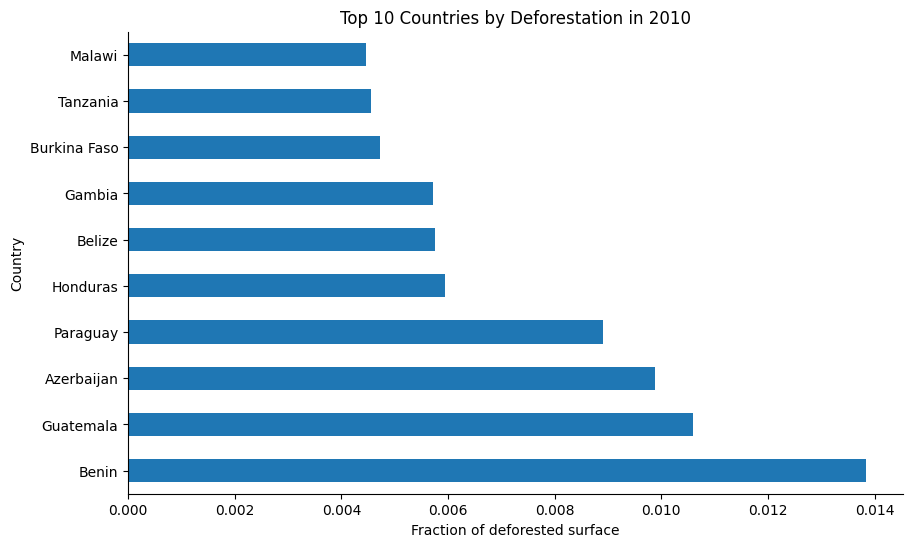

In [112]:
# SOLUTION
top_10_def_area.plot(kind='barh', x='Entity', y='Fraction of deforested surface', figsize=(10, 6), 
            title=f"Top 10 Countries by Deforestation in {year}", 
            xlabel='Fraction of deforested surface', ylabel="Country", legend=False)

## Exercise 7: Bringing vegetable oil data in

We can further extend our analysis by bringing in data on vegetable oil production, which is a significant driver of deforestation in some regions.

First, we load the vegetable oil production dataset from Our World in Data, which contains production data for various types of oils (palm oil, soybean oil, sunflower oil, etc.).

In [ ]:
# SOLUTION
import pandas as pd


# Fetch the data.
df_oil = pd.read_csv("https://ourworldindata.org/grapher/vegetable-oil-production.csv?v=1&csvType=full&useColumnShortNames=false")

# df_oil = df_oil.dropna(subset=['Palm oil | 00000257 || Production | 005510 || tonnes'])
df_oil


,Entity,Code,Year,Sesame oil | 00000290 || Production | 005510 || tonnes,Maize oil | 00000060 || Production | 005510 || tonnes,Safflower oil | 00000281 || Production | 005510 || tonnes,Coconut oil | 00000252 || Production | 005510 || tonnes,Sunflower oil | 00000268 || Production | 005510 || tonnes,Rapeseed oil | 00000271 || Production | 005510 || tonnes,Palm kernel oil | 00000258 || Production | 005510 || tonnes,Groundnut oil | 00000244 || Production | 005510 || tonnes,Linseed oil | 00000334 || Production | 005510 || tonnes,Olive oil | 00000261 || Production | 005510 || tonnes,Palm oil | 00000257 || Production | 005510 || tonnes,Soybean oil | 00000237 || Production | 005510 || tonnes,Cottonseed oil | 00000331 || Production | 005510 || tonnes
0,Afghanistan,AFG,1961,2252.8,NaN,NaN,NaN,2937.75,NaN,NaN,NaN,3531.24,81.60,NaN,NaN,4997.35
1,Afghanistan,AFG,1962,1876.0,NaN,NaN,NaN,3137.75,NaN,NaN,NaN,3700.90,89.76,NaN,NaN,7715.83
2,Afghanistan,AFG,1963,1830.8,NaN,NaN,NaN,3137.75,NaN,NaN,NaN,2856.68,81.60,NaN,NaN,11741.71
3,Afghanistan,AFG,1964,2722.4,NaN,NaN,NaN,3137.75,NaN,NaN,NaN,3377.22,89.76,NaN,NaN,7960.34
4,Afghanistan,AFG,1965,2820.8,NaN,NaN,NaN,3237.75,NaN,NaN,NaN,4326.84,81.60,NaN,NaN,7926.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13228,Zimbabwe,ZWE,2018,NaN,14847.66,NaN,NaN,1800.00,NaN,NaN,10100.0,NaN,NaN,NaN,14700.0,9600.00
13229,Zimbabwe,ZWE,2019,NaN,11369.53,NaN,NaN,2500.00,NaN,NaN,9700.0,NaN,NaN,NaN,8300.0,11500.00
13230,Zimbabwe,ZWE,2020,NaN,14265.27,NaN,NaN,4600.00,NaN,NaN,8800.0,NaN,NaN,NaN,9700.0,11000.00
13231,Zimbabwe,ZWE,2021,NaN,14878.32,NaN,NaN,3500.00,NaN,NaN,7900.0,NaN,NaN,NaN,14700.0,13700.00


Since deforestation is driven by various oil crops (not just palm oil), **sum all vegetable oil production types to get a total for each country and year** and store it as a new column. This provides a more comprehensive view of agricultural oil pressure.

In [ ]:
# SOLUTION
# sum all vegetable oils

oil_columns = [col for col in df_oil.columns if 'Production' in col and 'tonnes' in col]
print("Available oils:", oil_columns)
# Sum all oil production for each country-year
df_oil['Total_Oil_Production'] = df_oil[oil_columns].sum(axis=1)

# df_oil['Total vegetable oil production'] = 

Available oils: ['Sesame oil | 00000290 || Production | 005510 || tonnes', 'Maize oil | 00000060 || Production | 005510 || tonnes', 'Safflower oil | 00000281 || Production | 005510 || tonnes', 'Coconut oil | 00000252 || Production | 005510 || tonnes', 'Sunflower oil | 00000268 || Production | 005510 || tonnes', 'Rapeseed oil | 00000271 || Production | 005510 || tonnes', 'Palm kernel oil | 00000258 || Production | 005510 || tonnes', 'Groundnut oil | 00000244 || Production | 005510 || tonnes', 'Linseed oil | 00000334 || Production | 005510 || tonnes', 'Olive oil | 00000261 || Production | 005510 || tonnes', 'Palm oil | 00000257 || Production | 005510 || tonnes', 'Soybean oil | 00000237 || Production | 005510 || tonnes', 'Cottonseed oil | 00000331 || Production | 005510 || tonnes']


## Exercise 8: Pivot by country the vegetable oil data

To get a by country view of vegetable oil production, pivot the vegetable oil dataset so that you have years as the index, countries as the columns, and total vegetable oil production as the values.



In [ ]:
# SOLUTION
# Pivot by country
df_total_oil = df_oil.pivot(index="Year", columns="Entity", values="Total_Oil_Production")


df_total_oil

Entity,Afghanistan,Africa,Africa (FAO),Albania,Algeria,Americas (FAO),Angola,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Western Africa (FAO),Western Asia (FAO),Western Europe (FAO),World,Yemen,Yugoslavia,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1961,13800.74,2.103199e+06,2103198.92,4961.59,49791.84,4772868.32,49804.61,41.05,402838.00,NaN,...,60915.55,21207.89,1155114.26,378339.50,1263821.40,1.744281e+07,2895.58,41274.74,1800.00,6566.40
1962,16520.24,2.151515e+06,2151514.61,6785.06,39273.16,5301551.82,52854.49,25.19,559128.00,NaN,...,72234.53,19913.26,1202346.97,287070.58,1313285.55,1.855945e+07,2916.34,77535.70,2000.00,5206.50
1963,19648.54,2.358832e+06,2358832.27,7315.30,43327.69,5326920.17,44604.92,21.17,510910.00,NaN,...,62336.76,20785.16,1274212.79,363264.21,1281856.61,2.008973e+07,2786.94,113039.29,2056.66,8163.00
1964,17287.47,2.320135e+06,2320134.49,12023.16,38153.80,5219592.56,49614.89,10.88,425929.00,NaN,...,80748.41,20924.73,1267942.36,453179.01,1352888.90,1.939400e+07,2341.02,111910.61,2563.83,8433.00
1965,18393.47,2.445356e+06,2445355.95,8125.51,37732.18,5773422.23,41746.44,12.12,675561.00,NaN,...,76150.84,21640.64,1411264.54,355971.77,1507690.63,2.120428e+07,2306.81,112830.12,2598.51,7893.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,36922.43,8.528983e+06,8528983.12,13066.34,128888.21,46517928.10,94521.92,5.62,8763297.00,289.0,...,224585.76,431578.09,4163732.94,2818166.90,8861999.13,2.013771e+08,6395.07,NaN,69280.99,51047.66
2019,40804.36,8.372070e+06,8372069.72,12263.63,151001.66,49282596.70,96019.10,NaN,9682707.00,151.9,...,170369.68,422030.58,3952636.78,2997836.56,9234436.30,2.110898e+08,8486.61,NaN,62379.45,43369.53
2020,29916.12,8.876780e+06,8876780.03,13591.71,255505.62,47642491.90,100048.57,NaN,8408205.02,81.2,...,193940.38,429682.98,3888472.52,3143839.52,9190845.40,2.084407e+08,8025.42,NaN,64850.37,48365.27


## Exercise 9: Select countries for comparison

Filter to include only countries that appear in both the top 10 deforestation list (from 2010, Exercise 5) AND have oil production data.

In [ ]:
# SOLUTION
# take a selction of countires presnet in the top deforestation and in teh oil data

country_selection = top_10['Entity'].tolist()
country_selection = [country for country in country_selection if country in df_total_oil.columns]

print(country_selection)

['Brazil', 'Democratic Republic of Congo', 'India', 'Indonesia', 'Angola', 'Australia', 'Tanzania', 'Paraguay', 'China', 'Argentina']


## Exercise 10: Plot vegetable oil production over time for selected countries

We normalize all oil production values relative to 1990 (baseline = 100) to make it easier to compare growth rates across countries of different sizes.

Produce two plots:

- first the normalised vegetable oil production over time for the selected countries
- then a smoothened version of the same plot (using a rolling mean with a window of 10 years).


In [ ]:
# SOLUTION
# Make values relative to year 1990 (base year = 100)
df_total_oil_relative = (df_total_oil / df_total_oil.loc[1990]) * 100


<Axes: title={'center': 'Vegetable Oil Production Growth (Relative to Year 1990)'}, xlabel='Year', ylabel='Index (1990 = 100)'>

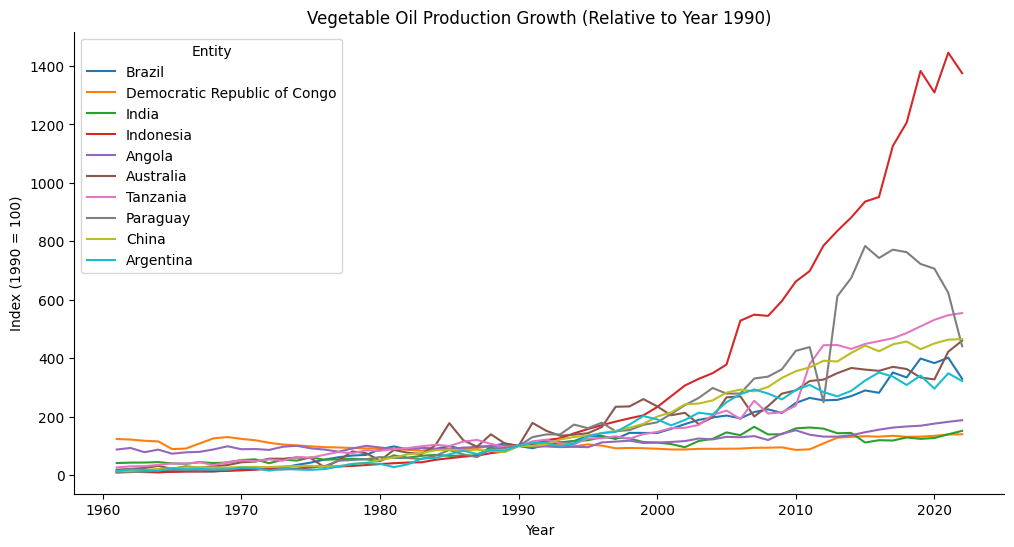

In [ ]:
# SOLUTION
# Plot relative growth
df_total_oil_relative[country_selection].plot(figsize=(12, 6),
                                               title='Vegetable Oil Production Growth (Relative to Year 1990)',
                                               ylabel='Index (1990 = 100)',
                                               xlabel='Year')

<Axes: title={'center': 'Vegetable Oil Production Growth - Smoothed (Relative to Year 1990)'}, xlabel='Year', ylabel='Index (1990 = 100)'>

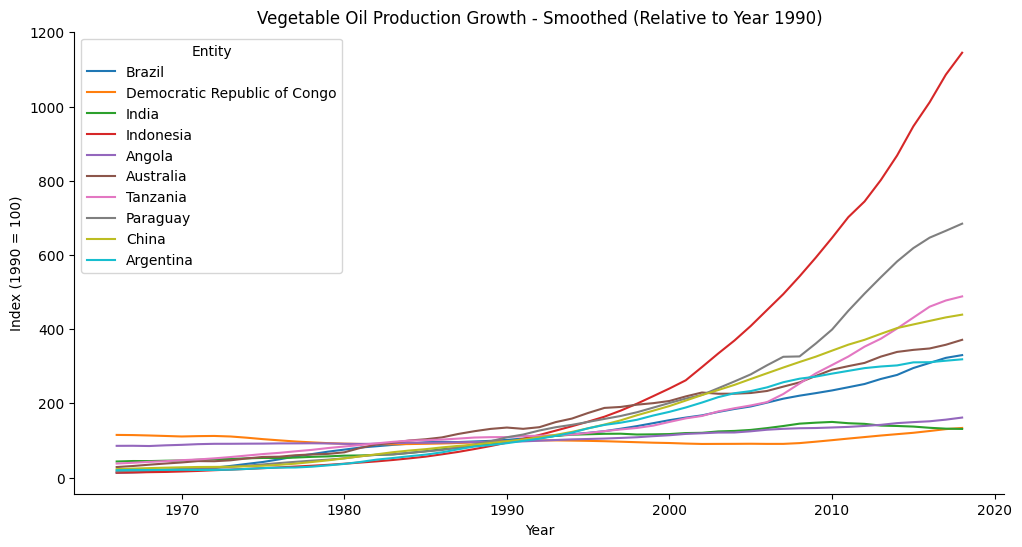

In [ ]:
# SOLUTION
# smoothened
df_total_oil_relative_smooth = df_total_oil_relative.rolling(window=10, center=True).mean()
# Plot relative growth
df_total_oil_relative_smooth[country_selection].plot(figsize=(12, 6),
                                               title='Vegetable Oil Production Growth - Smoothed (Relative to Year 1990)',
                                               ylabel='Index (1990 = 100)',
                                               xlabel='Year')

## Exercise 11: Comparing deforestation and oil production over time

For each of the following countries (Brazil, the Democratic Republic of Congo, India and Indonesia) plot a figure with the two lines:

- the normalised vegetable oil production over time (use the smoothed version from Exercise 10)
- the deforestation rate over time (also normalised to 1990)

Both lines should be on the same plot with the same y-axis scale (since both use 1990 = 100 as baseline).

**Note:** You may observe inverse correlations in some countries - this is expected and scientifically meaningful (see interpretation below).


**Hints.**

- You may need to drop `NaN` values with the `dropna()` method to get continuous lines
- You need first to normalise your deforestation data
- You may want to create a new dataframe using pd.DataFrame and a suitable dictionary

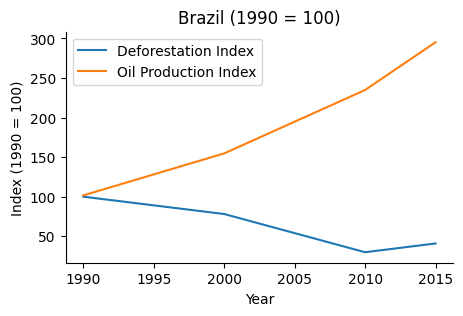

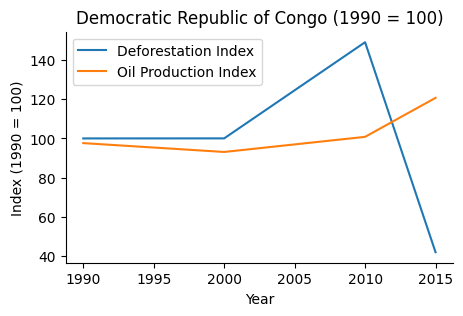

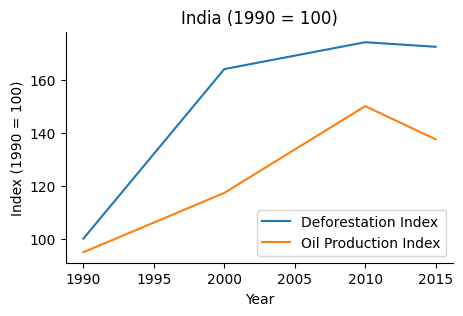

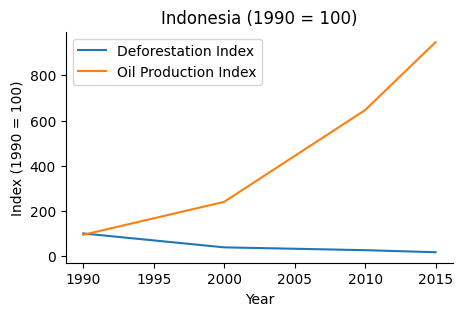

In [ ]:
# SOLUTION

# Normalize deforestation to 1990 baseline
df_deforestation_relative = (df_pivot / df_pivot.loc[1990]) * 100

countries = 'Brazil, Democratic Republic of Congo, India, Indonesia'.split(', ')
# Create plots for the first 4 countries
for country in countries:
    # Combine both series into a single dataframe
    df_combined = pd.DataFrame({
        'Deforestation Index': df_deforestation_relative[country],
        'Oil Production Index': df_total_oil_relative_smooth[country]
    })
    # Drop rows with NaN values so that the lines are continuous
    df_combined = df_combined.dropna()
    # Plot using pandas with both lines on the same scale
    df_combined.plot(figsize=(5, 3),
                     title=f'{country} (1990 = 100)',
                     xlabel='Year',
                     ylabel='Index (1990 = 100)',
                     )

## Interpretation of Results

You should observe different trends depending on the countries of consideration that can reflect different modes of production, deforestation and shifts in policies:

- Some countries show correlations between deforestation rates and vegetable oil production: this is typically when vegetable oil production requires direct area increases and deforestation is diffuse (small-scale clearing of land)
- Other countries can show inverse correlation: this can have various causes, for example time-lags between extensive deforestation and usage of the land, as well as different means of expanding vegetable oil production (conversion of already cleared land, e.g. pasture, into crops)

This exercise demonstrates that macroscale data analysis can be rather complex and requires multiple layers of information and datasets to be properly interpreted. In this specific case, we would need more information on the modes of production, land use changes, policies and economic drivers to make sense of the observed trends.